*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

### Ensembles of Estimators:
----
Generally a simple approach
1. Build Multiple Models 
2. Aggregate them


A commong example is **weather forecasting**

-----

When a forecast is given, it is usually from either the European model (ECMWF) might predict something, and the U.S based (GFS) might not.

Meterologists take both of these models and choose which one they think will be the most accurate

### There are two methods of Aggregating Models
----

#### Bagging
Bootstrap Aggregation

#### Boosting
Family of algorithms onverting weak to strong learners

#### Models We Will Cover
----
##### Classifications and Regressions for 
* Bagging
* Decision Trees
* Random Forest
* ADA -> Adaptive Boosting
* GBM

### Bagging
----
* Multiple overfitting estimators can be combined to reduce the effect of this overfitting is an ensemble method called **bagging**.


Bagging makes use of an ensemble (a grab bag) of parallel estimators, each of over-fits the data, and averages the results for a better classification.


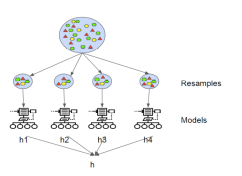

In [1]:
from IPython.display import Image
Image('../src/photos/bagging.png', width=800)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../data/loan.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
X = df[["Gender", "Age", "Salary"]]

KeyError: "None of [Index(['Gender', 'Age', 'Salary'], dtype='object')] are in the [columns]"

In [ ]:
y = df["Default"]

In [ ]:
numerical_variable = ["Age", "Salary"]
categorical_variable = ["Gender"]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numerical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="mean"))
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(sparse=False))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('munerical_transformer', numerical_transformer, numerical_variable),
    ('categorical_transformer', categorical_transformer, categorical_variable)
])

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('bagging_model', BaggingClassifier(n_estimators=100, max_samples=.40))
])

In [ ]:
model_1 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('decision_model', BaggingClassifier(n_estimators=100, base_estimator=KNeighborsClassifier(n_neighbors=7)))
])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model_1.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred_1 = model_1.predict(X_test)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[: , 1]
y_pred_prob_1 = model_1.predict_proba(X_test)[: , 1]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
plot_confusion_matrix(cm, df.Default.unique())

### Bagging Regressions
---

In [ ]:
df = pd.read_csv("../data/50_Startups.csv")

In [ ]:
df.head()

In [ ]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
categorical_features = ['State']
numeric_features = ['R&D Spend', 'Administration', 'Marketing Spend']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot' , OneHotEncoder(sparse=False))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
model = Pipeline(steps= [ ("preprocess", preprocessor), 
                         ("bagging_model", BaggingRegressor(n_estimators=100, max_samples=.20))
                        ])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

 ### Random Forests
 ---
An ensemble of randomized decision trees 

This type of bagging classification can be done using ``BaggingClassifier`` meta-estimator

In [ ]:
Image("../src/photos/random_forest.png")

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

We have randomized the data by fitting each estimator with a random subset of 80% of the training points.

Decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness.

For example, when determining which feature to split on, the randomized tree might select from among the top several features.



In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the ``RandomForestClassifier`` estimator, which takes care of all the randomization automatically.


All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

### Random Forest Regression
----

Random forests can also be made to work for continuous rather than categorical variables. 

The estimator to use for this is the ``RandomForestRegressor``

In [ ]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='h', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

Using the random forest regressor, we can find the best fit curve as follows:

* The true model is shown in the smooth gray curve,
* The random forest model is shown by the jagged red curve.


### Example: Random Forest for Classifying Digits
----

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
digits = load_digits()
digits.keys()

#### Visualize the first few data points:
---

In [ ]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Classify the digits using a random forest 
----

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

We can take a look at the classification report for this classifier:

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

### plot the confusion matrix:
----

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Boosting
---
Converting a weak learner into a strong learner can be done using methods like **average/weighted average** and **majority voting**

For choosing the right distribution:

**Step 1**:  The base learner takes all the distributions and assign equal weight or attention to each observation.

**Step 2**: If there is any prediction error caused by first base learning algorithm, then we pay higher attention to observations having prediction error. Then, we apply the next base learning algorithm.

**Step 3**: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved.

### Adaptive Boosting
----

In [ ]:
Image('../src/photos/adaptive_boosting.png')

**AdaBoost (Adaptive Boosting)**: 

It fits a series of weak learners on different weighted training data. 

Then starts by predicting original data set and gives equal weight to each observation. 

If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. 

Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

We can use AdaBoost algorithms for both classification and regression problem.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("../data/loan_knn.csv")

In [ ]:
df.head()

In [ ]:
X = df[["Gender", "Age", "Salary"]]

In [ ]:
y = df["Default"]

In [ ]:
numerical_variable = ["Age", "Salary"]
categorical_variable = ["Gender"]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numerical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="mean"))
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(sparse=False))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('munerical_transformer', numerical_transformer, numerical_variable),
    ('categorical_transformer', categorical_transformer, categorical_variable)
])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('gbm_model', AdaBoostClassifier(n_estimators=100) )
])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[: , 1]

In [ ]:
y_pred

In [ ]:
y_pred_prob

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
plot_confusion_matrix(cm, df.Default.unique())

#### For Regression
----

In [ ]:
df = pd.read_csv("../data/50_Startups.csv")

In [ ]:
df.head()

In [ ]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
categorical_features = ['State']
numeric_features = ['R&D Spend', 'Administration', 'Marketing Spend']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot' , OneHotEncoder(sparse=False))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = Pipeline(steps= [ ("preprocess", preprocessor), 
                         ("gbm_model", AdaBoostRegressor(n_estimators=100))
                        ])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

#### Boosting Algorithm: Gradient Boosting

It trains many model sequentially. 

Each new model gradually minimizes the loss function (y = ax + b + e)
of the whole system using Gradient Descent method.

The learning procedure consecutively fit new models to provide a more accurate estimate of the response variable.

Gradient Tree Boosting or GBRT is a generalization of boosting to arbitrary differentiable loss functions.

It can be used for both regression and classification problems.

### For Classification
----

In [ ]:
df = pd.read_csv("../data/loan_knn.csv")

In [ ]:
df.head()

In [ ]:
X = df[["Gender", "Age", "Salary"]]

In [ ]:
y = df["Default"]

In [ ]:
numerical_variable = ["Age", "Salary"]
categorical_variable = ["Gender"]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numerical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="mean"))
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(sparse=False))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('munerical_transformer', numerical_transformer, numerical_variable),
    ('categorical_transformer', categorical_transformer, categorical_variable)
])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('gbm_model', GradientBoostingClassifier() )
])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[: , 1]

In [ ]:
y_pred

In [ ]:
y_pred_prob

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
plot_confusion_matrix(cm, df.Default.unique())

### For Regressions
----

In [ ]:
df = pd.read_csv("../data/50_Startups.csv")

In [ ]:
df.head()

In [ ]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
categorical_features = ['State']
numeric_features = ['R&D Spend', 'Administration', 'Marketing Spend']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot' , OneHotEncoder(sparse=False))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = Pipeline(steps= [ ("preprocess", preprocessor), 
                         ("gbm_model", GradientBoostingRegressor())
                        ])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))